In [2]:
import pandas as pd
import numpy as np


In [3]:
cars_df = pd.read_csv("E:\\AIML\\projects\\Unsupervised Learning\\proj1_cars\\cars-dataset.csv", header = 0)
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [6]:
#After Analysing the dataset can see that hp column in dataframe contains '?'.
cars_df = cars_df.replace('?', np.nan)

In [7]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [8]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [9]:
cars_df['hp'] = cars_df['hp'].astype('float64')

In [10]:
num_cols = cars_df.drop('car name', axis=1)
#Creating car_names dataframe which inclused column "car name".
car_names = pd.DataFrame(cars_df[['car name']])

num_cols = num_cols.apply(lambda x: x.fillna(x.median()),axis=0)
cars_df = num_cols.join(car_names)  
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
car name    398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [11]:
cars_df.dtypes

cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
car name     object
dtype: object

In [12]:
cars_df.head()

,cyl,disp,hp,wt,acc,yr,mpg,car name
0,8,307.0,130.0,3504,12.0,70,18.0,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,15.0,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,18.0,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,16.0,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,17.0,ford torino


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

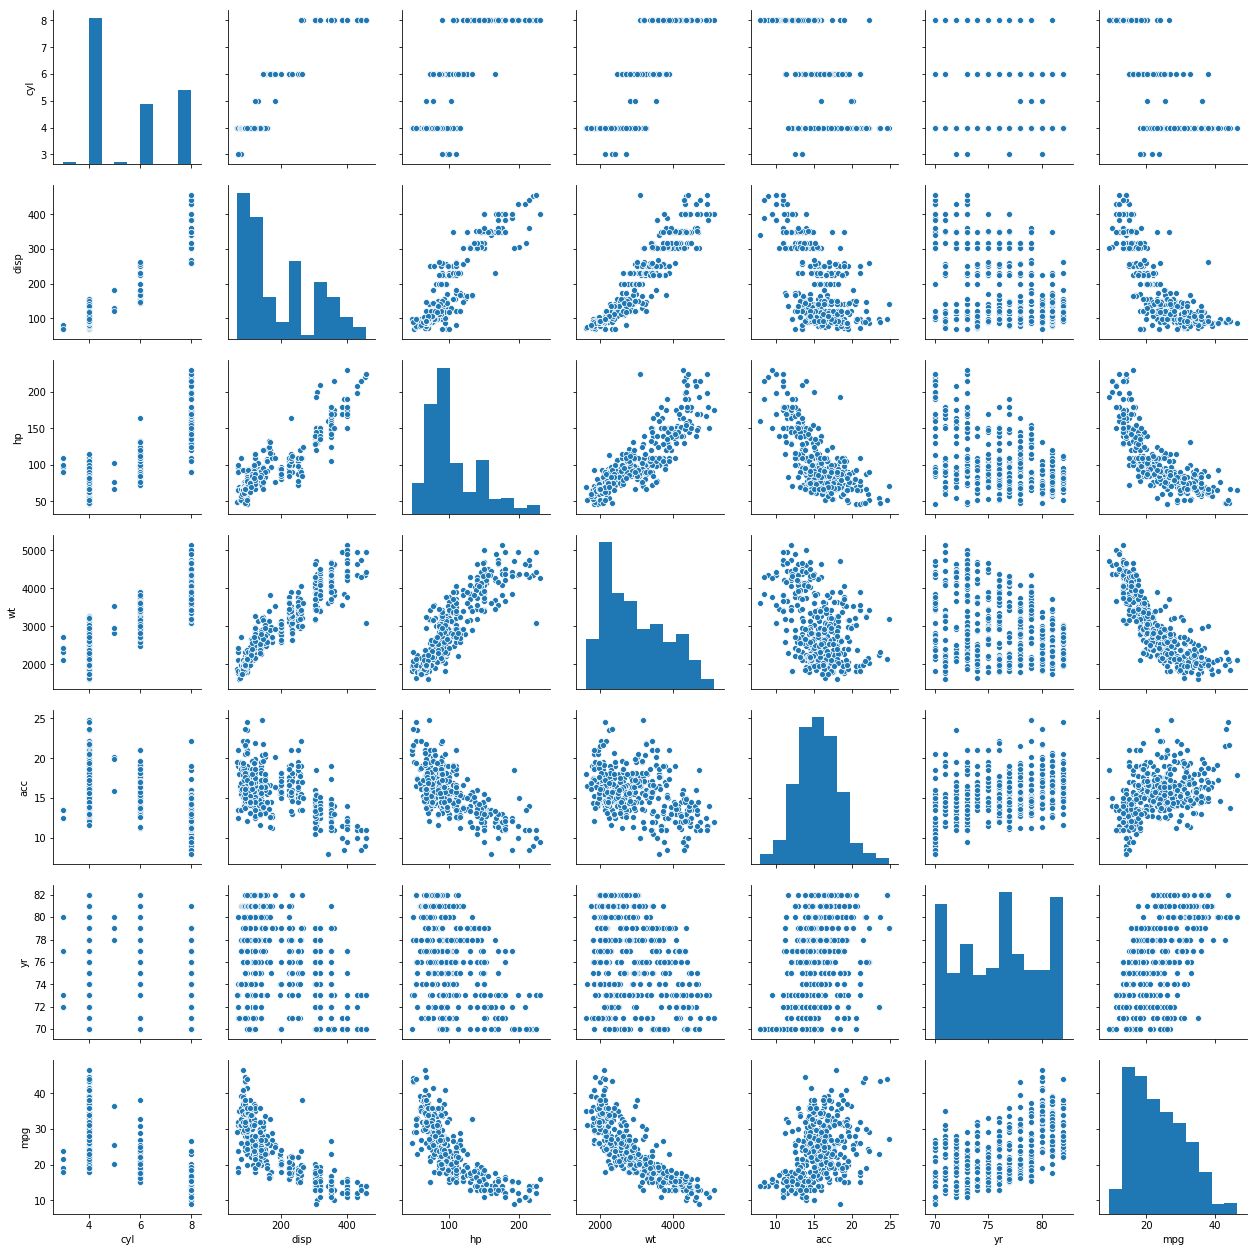

In [14]:
sns.pairplot(cars_df)

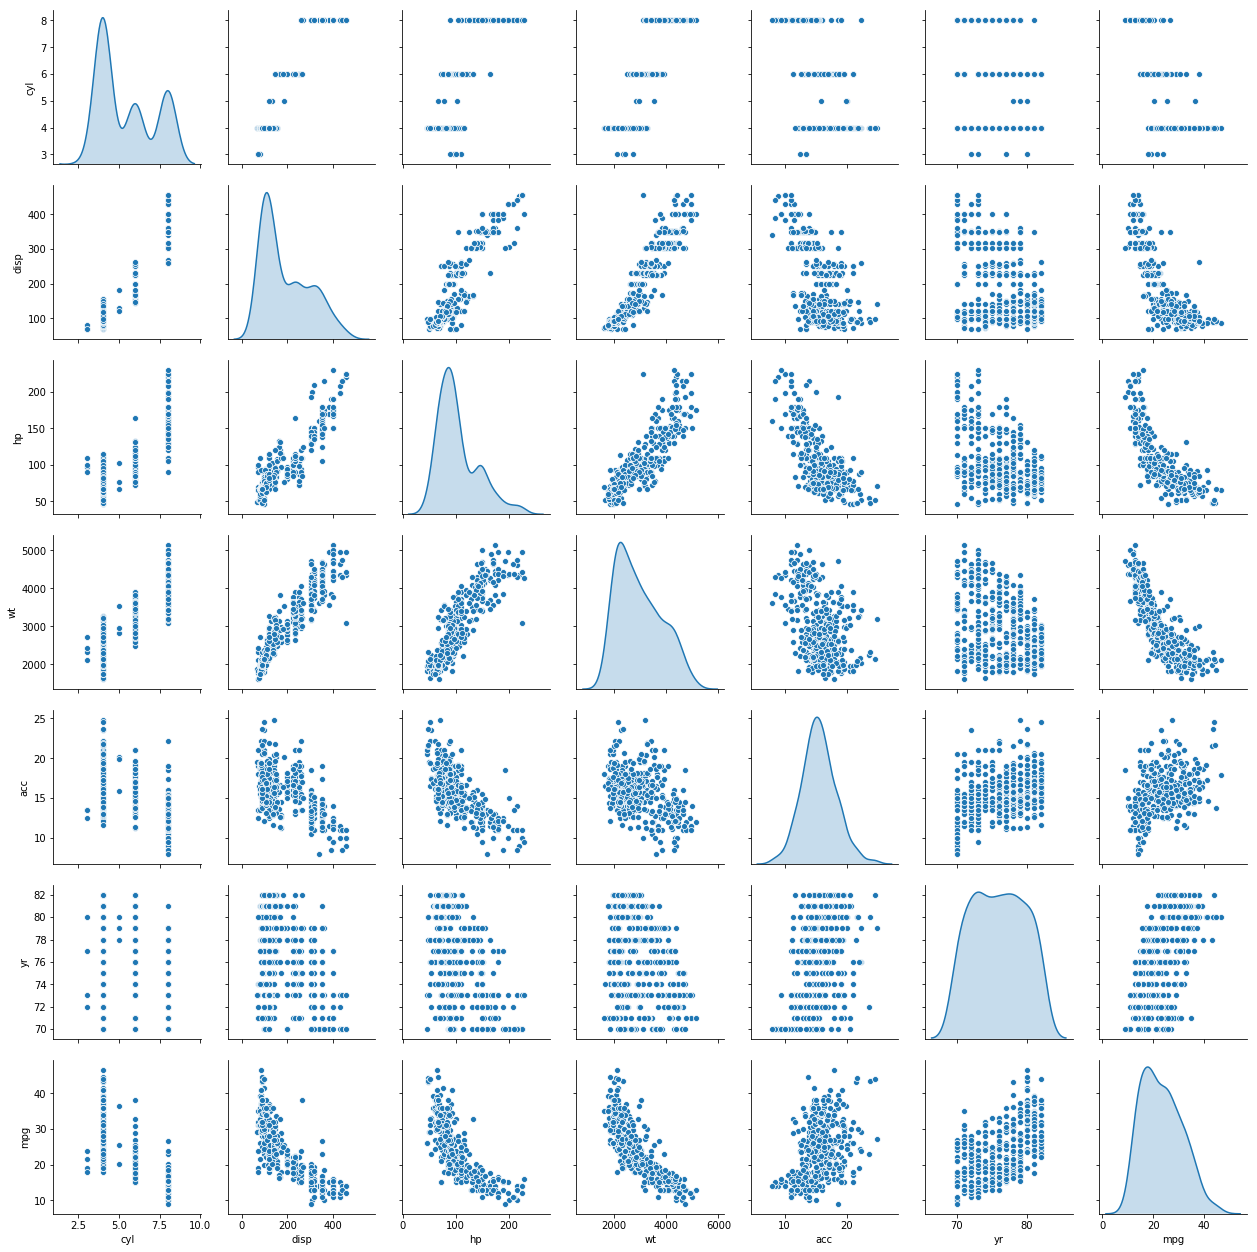

In [15]:
cars_df_new = cars_df.iloc[:,0:-1]
sns.pairplot(cars_df_new, diag_kind = 'kde')

In [16]:
from scipy.stats import zscore
#Dropping mpg as it's output variable here.
cars_df_new_z = cars_df_new.drop('mpg',axis=1).apply(zscore)
cars_df_new_z.head()

,cyl,disp,hp,wt,acc,yr
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(cars_df_new_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
distortion = []
km.inertia_
for i in range(1,8):
    km = KMeans(n_clusters=i)
    km.fit(cars_df_new_z)
    cars_df_new_z['k_' + str(i)] = km.predict(cars_df_new_z)
    distortion.append(km.inertia_)
print(i,km.inertia_)

7 470.99085429217155


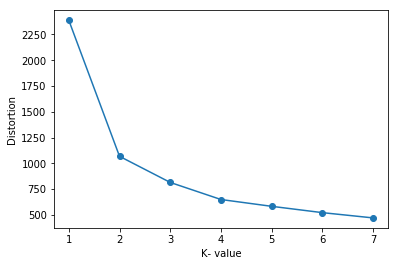

In [27]:
plt.plot(range(1,8),distortion,marker='o');
plt.xlabel('K- value');
plt.ylabel('Distortion');

In [28]:
#By above elbow method, we can predict that there can be 2 or 3 clusters. I am here choosing k = 3.

In [29]:
km = KMeans(n_clusters=3)
km.fit(cars_df_new_z)
km.cluster_centers_

array([[-2.00034228e-01, -2.19761103e-01, -3.34955354e-01,
        -2.14322925e-01,  1.00894745e-01,  4.89047450e-01,
         0.00000000e+00,  4.02298851e-02,  1.52298851e+00,
         1.43103448e+00,  4.77011494e-01,  1.04597701e+00,
         4.09770115e+00],
       [ 1.48605460e+00,  1.48450715e+00,  1.50624078e+00,
         1.38753374e+00, -1.06267868e+00, -6.44786937e-01,
         0.00000000e+00,  1.00000000e+00,  2.10942375e-15,
         2.00000000e+00,  2.65979381e+00,  3.01030928e+00,
         2.31958763e+00],
       [-8.60955437e-01, -8.32746156e-01, -6.91520662e-01,
        -7.66130582e-01,  6.73418475e-01, -1.77558453e-01,
         0.00000000e+00,  2.77555756e-16,  1.00000000e+00,
         1.59842520e+00,  2.40157480e+00,  3.59842520e+00,
         1.40157480e+00]])

In [30]:
centroid = pd.DataFrame(km.cluster_centers_, columns=cars_df_new_z.columns)

In [31]:
centroid

,cyl,disp,hp,wt,acc,yr,k_1,k_2,k_3,k_4,k_5,k_6,k_7
0,-0.200034,-0.219761,-0.334955,-0.214323,0.100895,0.489047,0.0,4.022989e-02,1.522989e+00,1.431034,0.477011,1.045977,4.097701
1,1.486055,1.484507,1.506241,1.387534,-1.062679,-0.644787,0.0,1.000000e+00,2.109424e-15,2.000000,2.659794,3.010309,2.319588
2,-0.860955,-0.832746,-0.691521,-0.766131,0.673418,-0.177558,0.0,2.775558e-16,1.000000e+00,1.598425,2.401575,3.598425,1.401575


In [32]:
labels = km.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,

In [33]:
cars_df_new['labels'] = cars_df_new_z['k_3']
cars_df_new.head()

,cyl,disp,hp,wt,acc,yr,mpg,labels
0,8,307.0,130.0,3504,12.0,70,18.0,0
1,8,350.0,165.0,3693,11.5,70,15.0,0
2,8,318.0,150.0,3436,11.0,70,18.0,0
3,8,304.0,150.0,3433,12.0,70,16.0,0
4,8,302.0,140.0,3449,10.5,70,17.0,0


In [34]:
c1=cars_df_new[cars_df_new['labels']==0]

In [35]:
c2=cars_df_new[cars_df_new['labels']==1]
c2.head()

,cyl,disp,hp,wt,acc,yr,mpg,labels
14,4,113.0,95.0,2372,15.0,70,24.0,1
18,4,97.0,88.0,2130,14.5,70,27.0,1
19,4,97.0,46.0,1835,20.5,70,26.0,1
20,4,110.0,87.0,2672,17.5,70,25.0,1
21,4,107.0,90.0,2430,14.5,70,24.0,1


In [36]:
c3=cars_df_new[cars_df_new['labels']==2]

In [37]:
x0 = c1.drop(['mpg','labels'],axis=1)

In [38]:
y0 = c1['mpg']

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x0, y0, test_size=0.20, random_state=1)

In [40]:
Reg_0 = LinearRegression()
Reg_0.fit(X_train, y_train)
print('Score of LM for C1 is {}'.format(Reg_0.score(X_test, y_test)))

Score of LM for C1 is 0.33607198573207564


In [41]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Reg_0.coef_[()][idx]))

The coefficient for cyl is -0.6180937834634826
The coefficient for disp is 0.0017063670515406915
The coefficient for hp is -0.02859589483778077
The coefficient for wt is -0.0013859750198593436
The coefficient for acc is -0.4087907055275057
The coefficient for yr is 0.3673022479348802


In [42]:
x1=c2.drop(['mpg','labels'],axis=1)
y1=c2['mpg']
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20, random_state=101)
Reg_1 = LinearRegression()
Reg_1.fit(X_train, y_train)
print('Score of LM for C2 is {}'.format(Reg_1.score(X_test, y_test)))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Reg_1.coef_[()][idx]))

Score of LM for C2 is 0.6295278585487398
The coefficient for cyl is 2.5248456894901894
The coefficient for disp is -0.04126666730725535
The coefficient for hp is -0.0966478435571772
The coefficient for wt is -0.005055073208391553
The coefficient for acc is -0.12634378393932316
The coefficient for yr is 0.8048400712582261


In [43]:
x2=c3.drop(['mpg','labels'],axis=1)
y2=c3['mpg']
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.20, random_state=101)
Reg_2 = LinearRegression()
Reg_2.fit(X_train, y_train)
print('Score of LM for C3 is {}'.format(Reg_2.score(X_test, y_test)))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Reg_2.coef_[()][idx]))

Score of LM for C3 is 0.4889211588914439
The coefficient for cyl is 0.6199565435402555
The coefficient for disp is 0.006436069631051266
The coefficient for hp is -0.05607615330756667
The coefficient for wt is -0.003681483354813908
The coefficient for acc is -0.40795649867712186
The coefficient for yr is 0.8098742546082982
